# <font color='BLUE'>MLP多層感知模型預測與調整</font>
1. DIY 資料集
2. 建模與訓練參數調整
3. 預測
4. 重建模型及調整參數

## 1. DIY 資料集

In [1]:
# 定義函式
import numpy as np

# 自訂顯示函數
def show(x, y):
    for i in range(len(x)):
	    print(x[i], y[i])  # 讓 x 和 y 並列比較

In [2]:
# 建立訓練集及測試集 DIY data

feature = 3  ## 樣本特徵數目

x_train = np.array([
  [15, 30, 40],
  [20, 40, 10],
  [40, 25, 35],
  [10, 40, 30],
  [30, 25, 35],
  [40, 35, 20]])
y_train = np.array([85, 70, 100, 80, 90, 95])

x_test = np.array([
  [15, 25, 35],
  [30, 10, 20],
  [25, 35, 10]])
y_test = np.array([75, 60, 70])

# 查看資料內容
show(x_train, y_train)
show(x_test, y_test)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


[15 30 40] 85
[20 40 10] 70
[40 25 35] 100
[10 40 30] 80
[30 25 35] 90
[40 35 20] 95
[15 25 35] 75
[30 10 20] 60
[25 35 10] 70
(6, 3) (6,) (3, 3) (3,)


## 2. 建模與訓練參數調整

In [3]:
# 匯入建模所需的模組
import tensorflow as tf

from tensorflow.keras.models import Model     # 模型工具
from tensorflow.keras.models import Sequential  # 順序模型
from tensorflow.keras.layers import Dense    # 全連接層


In [26]:
# MLP 建模
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=3, name='Hidden-1'))  #隱藏層
model.add(Dense(10, activation='relu', input_dim=3, name='Hidden-2'))  #隱藏層
model.add(Dense(1, name='Output')) #輸出層

# 編譯模型
model.compile(optimizer='adam', loss='mse')

# 查看模型定義及參數
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 10)                40        
                                                                 
 Hidden-2 (Dense)            (None, 10)                110       
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


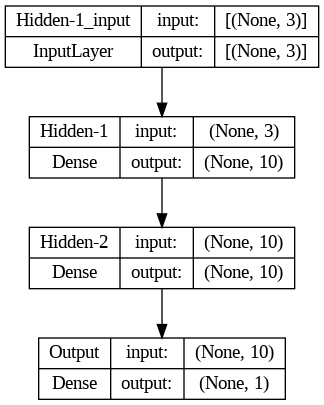

In [27]:
# 模型架構圖繪製
from tensorflow.keras.utils import plot_model  ## 繪圖用

plot_model(model, show_shapes=True)
# plot_model(model, show_shapes=True, to_file='model.png')  # 存檔

In [33]:
# 調整模型`訓練`參數
# del model #刪除model
%%time
# 訓練參數 epochs=10 100 1000
history = model.fit(x_train, y_train, epochs=1000, verbose=0)
#verbose: 0=無顯示, 1=進度條, 2=每輪一行。

CPU times: user 5.07 s, sys: 343 ms, total: 5.41 s
Wall time: 5.17 s


## 3. 預測

In [34]:
# 顯示訓練成效 loss
train_result = model.evaluate(x_train, y_train) # Train
test_result = model.evaluate(x_test, y_test) # Test
print('Train loss:%.10f'%train_result)
print('Test loss:%.10f'%test_result)

1/1 [==============================] - 0s 31ms/step - loss: 2.0631
Train loss:0.5206490159
Test loss:2.0630609989


In [36]:
# 預測與loss的關係
test_input = [[20, 30, 40],[15, 20, 37],[25, 6, 8],[1,2,3],[4,5,6],[1111,2222,3333]]
print(test_input)
test = model.predict(test_input, verbose=1)

print('預測序列值: ', test[:])
#loss大代表訓練效果不佳，loss越小，預測結果誤差會更小


[[20, 30, 40], [15, 20, 37], [25, 6, 8], [1, 2, 3], [4, 5, 6], [1111, 2222, 3333]]
1/1 [==============================] - 0s 31ms/step
預測序列值:  [[  91.27661  ]
 [  71.75427  ]
 [  37.098976 ]
 [   7.2057343]
 [  16.263264 ]
 [6599.4033   ]]


### 練習.如何降低誤差loss，增加訓練次數


```
History = model.fit(x_train, y_train, epochs=1000, verbose=0)
# epochs=1000 增加訓練次數
# verbose=0 不顯示訓練過程
```



## 4. 重建模型及調整參數

### 先清除與刪除模型

In [ ]:
# 調整的參數與訓練成效，會累積影響現有模型
# 清除與刪除現有模型，參數調整才會從頭開始

from tensorflow.keras import backend  # 後端模組

backend.clear_session()
del model

### 重新建模 > `增加隱藏層` `增加神經元數量` > 訓練 > 觀察誤差loss

In [ ]:
# 若模型已清除，有錯誤是正常
model.summary()

### MLP模型增加隱藏層

In [ ]:
# 1. MLP 增加隱藏層
# 2. 增加神經元數量(輸出尺寸)
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=3, name='Hidden-1'))
# 當loss降不下來 調整模型參數，增加1層，增加神經元數量(輸出尺寸)10 > 100
model.add(Dense(100, activation='relu', name='Hidden-2'))
model.add(Dense(1, name='Output'))
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
# 重新訓練模型
%%time
# 訓練參數 epochs= 1000 2000
history = model.fit(x_train, y_train, epochs=500, verbose=0)
#verbose: 0=無顯示, 1=進度條, 2=每輪一行。

In [ ]:
# 顯示訓練成效loss
train_result = model.evaluate(x_train, y_train)
test_result = model.evaluate(x_test, y_test)
print('Train loss:%.10f'%train_result)
print('Test loss:%.10f'%test_result)

In [ ]:
# 預測
test_input = [[20, 30, 40]]
print(test_input)
test = model.predict(test_input, verbose=1)
print("預測序列值: ",test[0][0])
#loss大 > 代表訓練效果不佳，loss越小，預測結果誤差會更小

## Homework與延伸學習:
1. 將深度學習內容，依照SOP順序實作在下方空格
2. 經過練習與調整，覺得比較好的參數組合:模型層數? 神經元數量? 訓練次數?

In [ ]:
#SOP-1 資料


In [ ]:
#SOP-2 模型


In [ ]:
#SOP-3 預測


## 總結

1. 自己建立簡單dataset，易於理解，可以嘗試建立不同的dataset來預測。
2. 理解數據的特徵，例如: 10, 20, 30...，明顯的數據特徵就是間隔為10。
3. 調整模型將可以優化預測結果，誤差loss越小，預測結果也越好。
